## FeatureEngineering 유의사항

### 1. row clean 
##### 각자 Feature들 보시면서 우선적으로 NA 값이나 이상치부터 확인해주세요. 이 것들을 1) Impute or 2) 삭제하도록 하겠습니다.
*(이 과정을 생략하게 되면 모델 돌릴 때 NA 값 때문에 모델이 돌아가지 않습니다)*

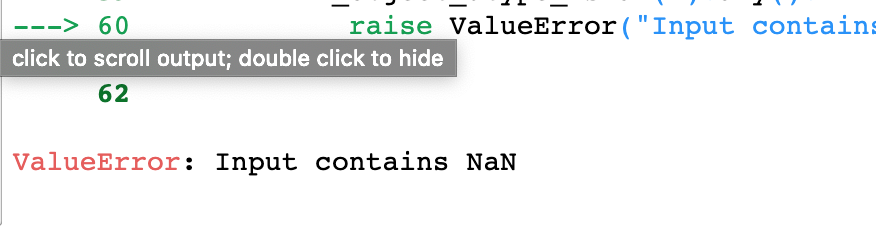

##### Train 데이터프레임을 받아서 행만 삭제한 새로운 데이터프레임 형태로 다음 분이 그대로 이어서 행 삭제할 수 있도록 함수화해주시면 되겠습니다.
*<example>*

*def row_clean(OLD_TRAIN_SET) :*

*.....*

*return NEW_TRAIN_SET*


### 2. FeatureEngineering
##### 모형에 들어갈 수 있고 변수가 의미를 가지도록 변수를 만질 수 있도록 해 주세요.
##### 이 과정도 함수화, Pipeline화해서 나중에 Tunning하기 좋게 하면 좋을 거 같아요.
##### FeatureEngineering해서 numpy형식으로 출력되도록 하는 게 좋을 것 같아요.


-----------
-----------


## FeatureEngineering on 
### weather var : 'tmprtr','prcpttn','wnd_spd','wnd_drctn','hmdt' 
### land_info : 'jmk','rgnl_ar_nm','rgnl_ar_nm2','lnd_us_sttn_nm','rd_sd_nm'

## 0. Setting

In [445]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer                          

from sklearn.compose import ColumnTransformer,make_column_transformer

from sklearn.decomposition import PCA


In [390]:
work_dir = '/Users/ieunpyo/PycharmProjects/Kaggle/gimhae_fire/'

train = pd.read_csv((work_dir + 'PJT002_train.csv'),encoding='utf-8' )
validation = pd.read_csv((work_dir + 'PJT002_validation .csv'),encoding='utf-8' )
# 일단 무거우니까 test_set 놔 둠.
# test_set = pd.read_csv((work_dir + '/' + 'PJT002_test.csv')

## 1. DB Cleaning

### 버릴 row 버리기

**지금은 비어 있지만, 계속 만져보면서 진짜 이상한 행들은 버리고 새로운 train set 정의하도록 하겠습니다.**

-------
-------

## 2. weather variables FeatureEngineering 

### step1 : select variable to drop

##### delete variable name from the weather_pipe_var_2

### step2 : imputer 

##### step2_1 : prcpttn_imputer - fillna(x) * imputing prcpttn's NA with x (x should be hyperparameter)
##### step2_2 : NA_imputer - IterativeImputer * imputing NAs with Iterative_imputer 
    
### step3 : scaler & PCA * scaling & pca
    


-----------------

In [468]:
weather_var = ['prcpttn', 'tmprtr', 'wnd_spd', 'wnd_drctn', 'hmdt']
train[weather_var].head()

,prcpttn,tmprtr,wnd_spd,wnd_drctn,hmdt
0,NaN,10.7,0.9,200.0,96.0
1,NaN,19.5,0.5,20.0,74.0
2,NaN,15.5,2.0,90.0,21.0
3,NaN,20.6,0.4,0.0,91.0
4,NaN,12.7,0.6,360.0,89.0


참고 : https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65

In [469]:
# 만약 이 중 변수를 제거하고 싶으면 여기 리스트에서 이름을 삭제하면 된다.
# pipeline 안에 넣고 싶었지만 변수를 중간에 제거하는 것은 파이프라인에 안 들어간다. 도저히... 안된다고 한다...
weather_var_1 = ['prcpttn']
weather_var_2 = ['tmprtr','wnd_spd','wnd_drctn','hmdt'] 
weather_var = weather_var_1 + weather_var_2

weather_imputer = ColumnTransformer([
    ('prcpttn_imputer',SimpleImputer(strategy='constant',fill_value=-1),weather_var_1),
    ('otehrs_imputer',IterativeImputer(),weather_var_2)
     ])

weather_scale_PCA = Pipeline([
    ('Scaler',StandardScaler()),
    ('PCA',PCA())
])

weather_pipe = Pipeline([
    ('weather_imputer',weather_imputer),
    ('weather_scale_PCA',weather_scale_PCA)
    
])

In [470]:
weather_pipe.fit_transform(train[weather_var])

array([[ 0.83696482, -0.06593299,  0.27633869, -1.05562882, -0.48734151],
       [ 1.27023595, -0.08216013, -0.70304549,  0.42325286,  0.22044418],
       [-1.04874847, -0.52521494, -0.44697804,  1.40230662,  0.76804871],
       ...,
       [-1.28843737,  0.21226355, -0.011177  ,  0.03247435, -0.63159873],
       [ 0.11110034,  1.62059609,  0.87102948, -1.51675953,  0.06328016],
       [ 0.78164759,  0.23277003, -0.15921767, -0.97506574, -0.14958609]])

In [471]:
weather_pipe.get_params()

{'memory': None,
 'steps': [('weather_imputer',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('prcpttn_imputer',
                                    SimpleImputer(add_indicator=False, copy=True,
                                                  fill_value=-1,
                                                  missing_values=nan,
                                                  strategy='constant', verbose=0),
                                    ['prcpttn']),
                                   ('otehrs_imputer',
                                    IterativeImputer(add_indicator=False,
                                                     estimator=None,
                                                     imputation_order='ascending',
                                                     initial_strategy='mean',
                                                     max_iter=10, ma

.

## 3. land_info var FeatureEngineering

##### 3.1. Data head()

In [221]:
train.iloc[0:5,151:157] 

,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm
0,대,106536,자연녹지지역,지정되지않음,단독,세로한면(불)
1,대,86366,계획관리지역,지정되지않음,단독,세로한면(가)
2,답,107560,제2종일반주거지역,지정되지않음,연립,중로한면
3,대,97550,제1종일반주거지역,지정되지않음,단독,세로한면(불)
4,임,130501,자연환경보전지역,지정되지않음,자연림,세로한면(불)


In [381]:
# 내가 맡은 변수
land_info_var_2 = ['jmk','rgnl_ar_nm','rgnl_ar_nm2','lnd_us_sttn_nm','rd_sd_nm']

##### 3.2. 결측치 확인하기

위 변수들의 결측치가 아마 주최측에서 fr==N 의 데이터를 수집하는 과정에서 대부분(99%) 생긴 것이라고 추측이 된다.

idea:

고려해볼 수 있는 옵션
1) 지우기 2) na 자체를 하나의 범주로 취급 3) imputation

우선 지우기보다는 값을 살려서 가져 가는 게 더 좋아보이는데 그 중 원래는 imputation을 고려했으나, 위에서 본 바와 같이 na 자체가 엄청나게 큰 예측 정보를 가지고 있는 것을 확인하였기 때문에 2) na 자체를 하나의 범주로 취급하는 편이 더 합당해보인다.




**결측치만 잘 정리되면 one-hot 때려넣으면 되니까 어려울 거 없지


In [382]:
# land_info_var_2 확인

# jmk 변수 다행히도 결측치 없다.
print(sum(train.jmk.isna()))

# rgnl_ar_nm : 1491개 결측치 존재
print(sum(train.rgnl_ar_nm.isna()))

# rgnl_ar_nm2 : 1491개 결측치 존재
print(sum(train.rgnl_ar_nm2.isna()))

# lnd_us_sttn_nm : 1776개 결측치 존재
print(sum(train.lnd_us_sttn_nm.isna()))

# rd_sd_nm : 1491개 결측치 존재
print(sum(train.rd_sd_nm.isna()))

0
1491
1491
1776
1491


In [410]:
# rgnl_ar_nm 과 rgnl_ar_nm2 rd_sd_nm 세변수의 결측치 위치 같다. 심상치 않다. 왜 몰랐을까...
# lnd_us_sttn_nm 또한 rgnl_ar_nm이 결측치인 곳에서 다 결측치더라
print(len(train))
print(sum(train.rgnl_ar_nm.isna()==train.rgnl_ar_nm2.isna()))
print(sum(train.rgnl_ar_nm.isna()==train.rd_sd_nm.isna()))

59199
59199
59199


In [394]:
sum(train[train['fr_yn']=='Y'].rgnl_ar_nm.isna()) / len(train[train['fr_yn']=='Y'])

0.0019589917722345565

In [395]:
sum(train[train['fr_yn']=='N'].rgnl_ar_nm.isna()) / len(train[train['fr_yn']=='N'])

0.028636839858755966

In [403]:
len(train[ (train['fr_yn']=='N') & (train['bldng_us'].isna()) ] ) / len(train[train['fr_yn']=='N'])

0.5363975010670909

##### ㄸㄸㄸㄸㄸㄸㄷ bldng_us, bldng_archtctr,rgnl_ar_nm(,rgnl_ar_nm2) 가 na인 친구들의 99퍼센트가 fr_yn == 'N'

In [409]:
# bldng_us 값이 빈 애들 중 fr_yn가 N인 비율
print(len(train[ (train['fr_yn']=='N') & (train['bldng_us'].isna()) ] ) /  len(train[train['bldng_us'].isna()]))
# bldng_us 값이 빈 애들 중 fr_yn가  Y인 비율
print(len(train[ (train['fr_yn']=='Y') & (train['bldng_us'].isna()) ] ) /  len(train[train['bldng_us'].isna()]))

# bldng_archtctr 값이 빈 애들 중 fr_yn가 N인 비율
print(len(train[ (train['fr_yn']=='N') & (train['bldng_archtctr'].isna()) ] ) /  len(train[train['bldng_archtctr'].isna()]))
# bldng_archtctr 값이 빈 애들 중 fr_yn가 Y인 비율
print(len(train[ (train['fr_yn']=='Y') & (train['bldng_archtctr'].isna()) ] ) /  len(train[train['bldng_archtctr'].isna()]))


# rgnl_ar_nm 값이 빈 애들 중 fr_yn가 N인 비율
print(len(train[ (train['fr_yn']=='N') & (train['rgnl_ar_nm'].isna()) ] ) /  len(train[train['rgnl_ar_nm'].isna()]))



0.9989160674928641
0.001083932507135889
0.9992409181275981
0.0007590818724019519
0.9899396378269618


In [416]:
# lnd_us_sttn_nm 와 rgnl_ar_nm이 결측치 위치 비교

# 아까 위에서 말한 것처럼 rgnl_ar_nm 이 결측치인 경우 lnd_us_sttn_nm 또한 결측치이다. 거기에 몇백개 더 있는 정도
print(len(train[ (train['fr_yn']=='N') & (train['lnd_us_sttn_nm'].isna()) & (train['rgnl_ar_nm'].isna()) ] ))  


1476


In [425]:
# rgnl_ar_nm ^= na, lnd_us_sttn_nm ==na 일 때 Y, N 분포 확인
# 즉, lnd_us_sttn_nm 만 na인 행들

# rgnl_ar_nm ^= na, lnd_us_sttn_nm ==na 일 때 Y의 수
print ( len ( train[ ( train['rgnl_ar_nm'].isna()==False ) & 
                     ( train['lnd_us_sttn_nm'].isna() ) & 
                     ( train['fr_yn']=='Y' ) ] ) ) 

# rgnl_ar_nm ^= na, lnd_us_sttn_nm ==na 일 때 N의 수
print ( len ( train[ ( train['rgnl_ar_nm'].isna()==False ) & 
                     ( train['lnd_us_sttn_nm'].isna() ) & 
                     ( train['fr_yn']=='N' ) ] ) )

# rgnl_ar_nm ^= na, lnd_us_sttn_nm ==na 일 때 fr_yn == Y 의 비율 : 0.14
print( 40 / (40+245))

# 전체 표본에서 fr_yn == Y 의 비율 : 0.13
print( len(train[train['fr_yn']=='Y']) / len(train)   )


# 차이 크게 없다.

40
245
0.14035087719298245
0.12934340107096404


#### 추가적으로 지현님이 가져가졌던 변수(land_info_var_1)들이 내 변수랑 같이 움직이는 것 같아서 그것도 확인.

In [426]:
# 지현님 변수
land_info_var_1 =['bldng_us','bldng_archtctr','bldng_ar','ttl_ar','lnd_ar']


In [430]:
type(train.bldng_us)

pandas.core.series.Series

In [433]:
type(train['bldng_us'])

pandas.core.series.Series

##### 내 변수랑 완전 같이 움직일 줄 알았는데 여기가 결측치 훨씬 많다.(20배 이상) 아래 코드 확인

##### ['bldng_ar','ttl_ar','lnd_ar']  이 세 변수의 경우, 0인 것이 말이 안 됨. ( building_cnt ==0 인 행이 한개도 없다. )

##### 얘네들은 값이 0인 경우 결측치라고 봐야 함.

In [438]:
for var in ['bldng_us','bldng_archtctr'] :
    print(var )
    print(sum(train[var].isna()))

bldng_us
27677
bldng_archtctr
27665


In [441]:
for var in ['bldng_ar','ttl_ar','lnd_ar'] :
    print(var )
    print(sum(train[var]==0))

bldng_ar
9660
ttl_ar
8426
lnd_ar
25569


##### 얘네들도  conditional 걸어서 확인해보자
##### 즉, P(fr_yn == N | variable is missing ) 확인

또 어마어마한 비율로 N 나온다.

In [442]:
for var in ['bldng_us','bldng_archtctr']  : 
    print(var)
    # var==na일 때 fr_yn==N 의 비율 확인해봄 conditional 걸어봄.
    print( len( train[ (train[var].isna()) & ( train['fr_yn']=='N' ) ]) / len( train[ train[var].isna() ] ) )

bldng_us
0.9989160674928641
bldng_archtctr
0.9992409181275981


In [443]:
for var in ['bldng_ar','ttl_ar','lnd_ar']  : 
    print(var)
    # var==0일 때 화재의 비율이 어떻게 되는 지 conditional 걸어봄.
    print( len( train[ (train[var]==0) & ( train['fr_yn']=='N' ) ]) / len( train[ train[var]==0] ) )

bldng_ar
0.994927536231884
ttl_ar
0.9971516733918823
lnd_ar
0.9059407876725722


##### 결론적으로, 지현님 변수들도 NA, 0 값을 가지는 변수들을 다 구분해서 one-hot-encoding 해줘야 될 것 같다.

##### 3.3. 결측치 처리

##### 참고 : landinfo_num 의 경우 0의 값도 문제가 되지만, 말도 안 되게 큰 값을 가지는 행들도 문제가 된다.
##### 이 값들은 미리 1) 새로운 값을 적당히 기입하는 방법? 2) 지우기? 근데 지우게 되면 test에 있는 이상한 숫자들은 어떻게 하지...

In [ ]:
landinfo_cat = ['bldng_us','bldng_archtctr','jmk',,'rgnl_ar_nm','rgnl_ar_nm2','lnd_us_sttn_nm']
landinfo_num = ['bldng_ar','ttl_ar','lnd_ar']

# 결측치 처리는 SimpleImputer? fillna? -> constant 'empty'

landinfo_cat_pipeline = ColumnTransformer([
    ('na_to_empty',SimpleImputer(strategy='constant',fill_value=-'empty'),landinfo_cat )
    ('one_hot',OneHotEncoder(),landinfo_cat)
    
])

landinfo_num_pipeplie = ColumnTransformer([])




In [ ]:
# 만약 이 중 변수를 제거하고 싶으면 여기 리스트에서 이름을 삭제하면 된다.
# pipeline 안에 넣고 싶었지만 변수를 중간에 제거하는 것은 파이프라인에 안 들어간다. 도저히... 안된다고 한다...
weather_pipe_var_1 = ['prcpttn']
weather_pipe_var_2 = ['tmprtr','wnd_spd','wnd_drctn','hmdt'] 
weather_var = weather_pipe_var_1 + weather_pipe_var_2

weather_imputer = ColumnTransformer([
    ('prcpttn_imputer',SimpleImputer(strategy='constant',fill_value=-1),weather_pipe_var_1),
    ('otehrs_imputer',IterativeImputer(),weather_pipe_var_2)
     ])

weather_scale_PCA = Pipeline([
    ('Scaler',StandardScaler()),
    ('PCA',PCA())
])

weather_pipe = Pipeline([
    ('weather_imputer',weather_imputer),
    ('weather_scale_PCA',weather_scale_PCA)
    
])

## 4. 추가적으로 까먹었던, dt_of_fr 

### 간단한 engineering

##### 너무 작은 시간 단위(분, 초, ... ) 는 버리도록 하자

In [294]:
import datetime

In [273]:
# dt_of_fr에는 결측치가 없다. 
train.dt_of_fr.hasnans

False

In [378]:
def dt_of_fr_split(df) :
    year_list = []
    month_list =  []
    day_list = []
    weekday_list = []
    hour_list = []
    
    season_list = []
    
    for i in range(len(df)) : 
        date_0=train.dt_of_fr[i].split(' ')[0] # '2017-10-20'
        time_0=train.dt_of_fr[i].split(' ')[1] # '05:54:00'
        
        year = int(date_0.split('-')[0]) # 2017
        month = int(date_0.split('-')[1]) # 10
        day = int(date_0.split('-')[2]) # 20
        weekday = datetime.date(year,month,day).weekday() # 0 : 월~ 6 : 일
        
        hour = int(time_0.split(':')[0]) # 05
        
        
        if month in [3,4,5] :
            season = 0
        elif month in [6,7,8] :
            season = 1
        elif month in [9,10,11] :
            season = 2 
        else :
            season =3
            
        year_list.append(year)
        month_list.append(month)
        day_list.append(day)
        weekday_list.append(weekday)
        season_list.append(season)
        
        hour_list.append(hour)
        
    df['year'] = year_list
    df['month'] = month_list
    df['day'] = day_list
    df['weekday'] = weekday_list
    df['season'] = season_list
    df['hour'] = hour_list
    
    return df

        

In [391]:
train = dt_of_fr_split(train)

In [392]:
train.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,year,month,day,weekday,season,hour
0,2017-10-20 05:54:00,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,...,NaN,NaN,NaN,NaN,2017,10,20,4,2,5
1,2018-09-30 08:26:15,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,2018,9,30,6,2,8
2,2016-10-30 14:57:00,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,...,NaN,NaN,NaN,NaN,2016,10,30,6,2,14
3,2016-06-14 05:23:58,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,...,NaN,NaN,NaN,NaN,2016,6,14,1,1,5
4,2018-04-22 05:38:59,N,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,4,22,6,0,5
